In [8]:
import os
import sys
import xarray as xr
import dask
import matplotlib.pyplot as plt
import numpy as np
import cmocean.cm as ocm
from scipy import stats
import pandas as pd
import math

proj_dir = os.path.join(os.pardir,os.pardir)
data_dir = os.path.join(proj_dir,'data','analysis')
fig_dir  = os.path.join(proj_dir,'reports','tidal_melting','figures')
int_dir = os.path.join(data_dir,'interim')
raw_dir = os.path.join(data_dir,'raw')

src_dir = os.path.join(proj_dir,'src')
sys.path.append(src_dir)

from visualization.shiftedColorMap import shiftedColorMap
from roms_tools.cartesian_grid_2d import cartesian_grid_2d

tools_dir = os.path.join(proj_dir,'src','tools')
sys.path.append(tools_dir)

In [3]:
grid_path = os.path.join(int_dir,'grd4_dV.nc')
grd = xr.open_dataset(grid_path)

tides_hr = xr.open_dataset(os.path.join(raw_dir,'waom4_hr','ocean_avg_0010.nc'))

In [78]:
import matplotlib
from matplotlib.ticker import FormatStrFormatter
ds= u'\N{DEGREE SIGN}'

def plot_ts(ax,eta,xi,title,ufac=False,Tfac=False):
    #fig,ax = plt.subplots(figsize=(6,2))
    
    t = pd.date_range('2007-12-30T00:30:00',periods=720,freq='H')
    
    color='tab:blue'
    if ufac>1:
        ax.plot(t,tides_hr.ustar[:,eta,xi]*100*ufac,color=color)
        exp = int(-math.log10(ufac))
        ax.set_ylabel(f'u* [$10^{{{exp}}}$ cm/s]',color=color)
    else:
        ax.plot(t,tides_hr.ustar[:,eta,xi]*100,color=color)
        ax.set_ylabel(f'u* [cm/s]',color=color)
    
    ax.tick_params(axis='y',labelcolor=color)  
    ax.tick_params(axis='x',labelcolor='k')
    ax.yaxis.set_major_formatter(FormatStrFormatter('%i'))
    
    ax1 = ax.twinx()
    color='tab:red'
    if Tfac>1:
        ax1.plot(t,tides_hr.Tstar[:,eta,xi]*Tfac,color=color)
        exp = int(-math.log10(Tfac))
        ax1.set_ylabel(f'T* [$10^{{{exp}}}$ $^{{\circ}}$C]',color=color)
    else:
        ax1.plot(t,tides_hr.Tstar[:,eta,xi],color=color)
        ax1.set_ylabel(f'T* [$^{{\circ}}$C]',color=color)
    
    ax1.tick_params(axis='y',labelcolor=color)  
    ax1.tick_params(axis='x',labelcolor='k')
    ax1.yaxis.set_major_formatter(FormatStrFormatter('%i'))
    
    lat,lon = (grd.lat_rho[eta,xi].values,grd.lon_rho[eta,xi].values)
    ax1.set_title(title+f'\n ({lat:.2f}{ds}N, {lon:.2f}{ds}E)')
    ax1.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%d/%b'))
    start, end = ax1.get_xlim()
    ax1.xaxis.set_ticks(np.arange(start+3, end, 7))
 
    return ax,ax1

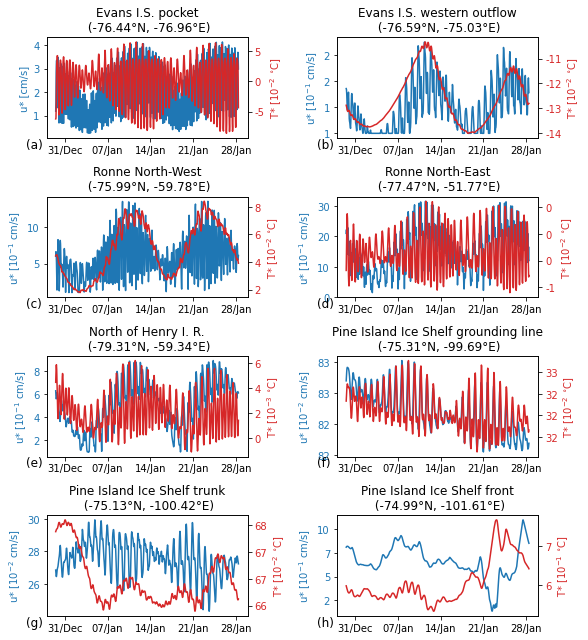

In [81]:
import string
fig,axes = plt.subplots(ncols=2,nrows=4,figsize=(8.27,9))

[ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8] = axes.flatten()
ax1,_=plot_ts(ax1,758,389,'Evans I.S. pocket',1,100)
ax2,_=plot_ts(ax2,769,396,'Evans I.S. western outflow',10,100)
ax3,_=plot_ts(ax3,867,419,'Ronne North-West',10,100)
ax4,_=plot_ts(ax4,886,481,'Ronne North-East',10,100)
ax5,_=plot_ts(ax5,823,499,'North of Henry I. R.',10,1000)
ax6,_=plot_ts(ax6,607,354,'Pine Island Ice Shelf grounding line',100,100)
ax7,_=plot_ts(ax7,601,350,'Pine Island Ice Shelf trunk',100,100)
ax8,_=plot_ts(ax8,592,348,'Pine Island Ice Shelf front',10,10)


for n,ax in enumerate(axes.flatten()):
    ax.text(-0.1, -0.1, "("+string.ascii_lowercase[n]+")", transform=ax.transAxes, size=12)

plt.tight_layout()

out_path = os.path.join(fig_dir,'timeseries_ustarTstar.png')
fig.savefig(out_path,format='png',dpi=300,bbox_inches = "tight")
plt.show()

In [77]:
ax2

<AxesSubplot:>